# Multiple Max Subarray Algorithm
This is the start of our multiple buy and sell max subarray algorithm.

It is messy and needs to be cleaned up and variables renamed.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from algs import find_maximum_subarray
import pandas as pd
from data import *
from algs import *
from plot import *

In [3]:
def split_region(data, low=None, high=None):
    if low == None:
        low = data.index[0] + 1
    if high == None:
        high = data.index[-1]
    
    # find indices of max subarray
    gain = find_maximum_subarray(data.change, low, high)
    
    # find indices of min subarray within max subarray above
    loss = find_maximum_subarray(-data.change, gain['low'], gain['high'])
    
    # find indices of left and right max subarray
    # the split max subarrays are 
    left_split = find_maximum_subarray(data.change, gain['low'], loss['low']-1)
    right_split = find_maximum_subarray(data.change, loss['high'], gain['high'])
    
    return left_split, right_split

def get_splits(data, num_splits):
    '''num_splits is the number of times to split the region list in half
    if there will be 2^num_splits regions at the end'''
    
    for i in range(num_splits):
        # on the first run, split into the first 2 regions
        if i == 0:
            split_regions = list(split_region(data))
        # on successive runs, split each already split region
        else:
            new_split_regions = []
            for region in split_regions:
                new_split_regions = new_split_regions + list(split_region(data, region['low'], region['high']))
            split_regions = new_split_regions

    # convert list of dicts to dataframe
    split_regions = pd.DataFrame(split_regions)
    
    return split_regions

In [4]:
symbol = 'AAPL'
date_data = get_full_df(symbol)
date_data = get_years(date_data, 2)
data = date_data.reset_index()

In [5]:
num_splits = 2
split_regions = get_splits(data, num_splits)
splits = split_regions[split_regions['sum'] > 0]
total_sum = sum(splits['sum'])
splits

,high,low,sum
0,31,15,15.5703
1,203,56,37.3513
2,239,219,26.7838
3,382,273,70.3936


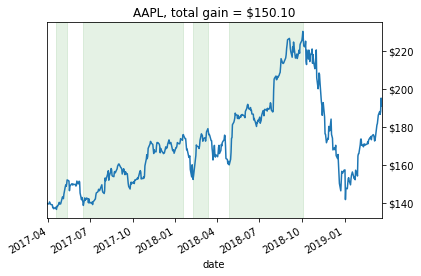

In [6]:
fig, ax = plt.subplots()
date_data.adj_close.plot()

# add dollar sign to y axis labels
formatter = ticker.FormatStrFormatter('$%.f')
ax.yaxis.set_major_formatter(formatter)

# put dollar amount labels on the right
ax.tick_params(left=False, right=True)
for tick in ax.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = True

# add highlight box for hold period
for i in range(len(splits)):
    low = splits.loc[i, 'low']
    high = splits.loc[i, 'high']
    plt.axvspan(date_data.index[low-1], date_data.index[high], color='green', alpha=0.1)
plt.title(f'{symbol}, total gain = \${total_sum:.2f}')

plt.savefig('test.svg')
plt.show()